На этот раз ситуация следующая: вы работаете в приложении по доставке готовых продуктов. К вам пришел коллега с результатами двух тестов:

В первом тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные 
Во втором: была обновлена кнопка заказа, и часть юзеров видела старый вариант, а часть – новый
Коллега пришел к вам с просьбой: он посмотрел на графики и предположил, что среди групп могут встретиться различия. Ваша задача – помочь ему проверить гипотезы, сделать соответствующие выводы на основе статистических тестов и принять решения.

**Задания:**
1. Выберите метод, который предположительно подойдет в первом вопросе.
- Проверьте, являются ли дисперсии внутри групп гомогенными.
- Проведите тест на нормальность распределения.
- Сравните средние в представленных группах.
- Используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 
- Примите решение: какие картинки в итоге будем использовать?
- Выберите метод для второго теста.
- Визуализируйте распределение events для контрольной и тестовой групп. 
- Посмотрите на описательные статистики events в разбивке по группе и по сегменту пользователя. 
- Выберите формулу для модели, проведите тест.  
**Описание данных**

**5_task_1**
- id – id клиента в эксперименте
- group – в каком разрешении показывались картинки (A – прямоугольные 16:9, B – квадратные, C – прямоугольные 12:4)
- events – сколько блюд суммарно было заказано за период   

**5_task_2:**
- id – id клиента в эксперименте
- segment – сегмент (high/low)
- group – вид кнопки (control – старая версия, test – новая версия)
- events – сколько блюд суммарно было заказано за период

1. Итак, первая задача: нужно проверить, какой формат фотографий блюд является наилучшим, т.е. в какой из групп в среднем покупали больше всего. Всего пользователям показывались три варианта:

    A – прямоугольные 16:9  
    B – квадратные   
    C – прямоугольные 12:4   
Каким статистическим тестом нужно воспользоваться для сравнения средних в данном случае?

    - посчитаю хи-квадрат (в этом уроке не изучаем)
    - **ANOVA (так как сравниваем три группы)**
    - сделаю вывод исключительно по графику
    - t-test (для двух групп)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize' :(16, 6)}, style = 'whitegrid')

import scipy.stats as stats

import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

In [3]:
url_1 = 'https://stepik.org/media/attachments/lesson/385920/5_task_1.csv'
task_1 = pd.read_csv(url_1)
task_1.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


2. Проверьте, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена.

Hint: scipy.stats.levene
   - p-value > 0.05, отклоняем нулевую гипотезу
   - **p-value > 0.05, не отклоняем нулевую гипотезу**
   - p-value < 0.05, отклоняем нулевую гипотезу
   - p-value < 0.05, не отклоняем нулевую гипотезу

In [4]:
stats.levene(task_1.query('group == "A"').events,\
             task_1.query('group == "B"').events,\
             task_1.query('group == "C"').events,\
             center='median')
#p-value > 0.05, не отклоняем нулевую гипотезу pvalue=0.1041327199523974

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

3. Также убедитесь, что данные распределены нормально, применив тест Шапиро-Уилка. Перед применением критерия при проверке на нормальность обязательно сделайте семплирование (1000 наблюдений), так как на больших выборках могут получаться неверные результаты. Для воспроизводимости результата используйте параметр random_state=17 в методе sample.
    - **Распределение events в группе B является нормальным**
    - **Распределение events в группе C является нормальным**
    - **Распределение events в группе A является нормальным**
    - Все утверждения не верны

In [5]:
events_A = task_1.query('group == "A"').events
events_B = task_1.query('group == "B"').events
events_C = task_1.query('group == "C"').events

In [6]:
# random_state чтобы значения ремплецировались, всегда результат одинаковый
print("Group A =", stats.shapiro(events_A.sample(1000, random_state=17)))
print("Group B =",stats.shapiro(events_B.sample(1000, random_state=17)))
print("Group C =",stats.shapiro(events_C.sample(1000, random_state=17)))

Group A = (0.9973153471946716, 0.09609563648700714)
Group B = (0.9980798363685608, 0.31768906116485596)
Group C = (0.9981185793876648, 0.3359004259109497)


4. Самое время провести тест! 

Для сравнения средних я использую однофакторный дисперсионный анализ (f_oneway). Значение статистики равно (окр. до целого) 
**2886**, а р-уровень значимости составил **0.0**.

In [7]:
round(stats.f_oneway(events_A, events_B, events_C)[0], 0)

2886.0

5. Теперь используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 
    - **A и C**
    - **A и B**
    - Нет значимых
    - **B и C**

In [8]:
# первая переменая события, второй группы,  meandiff - разница средних групп. 
# во всех случаях отклоняем нулевую гипотезу, т.к. reject = True
print(pairwise_tukeyhsd(task_1.events, task_1.group).summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


Text(0.5, 1.0, 'Число покупок и формат фотографий еды')

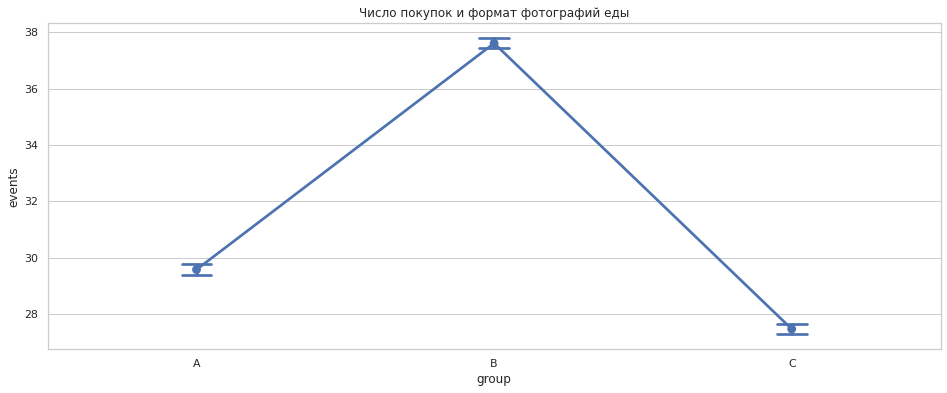

In [9]:
sns.pointplot(x = 'group', y = 'events', data = task_1, capsize = .1)
plt.title("Число покупок и формат фотографий еды")

6. Так какие картинки в итоге будем использовать?
    - **B Квадратные** видно из графика, что они дают наибольшее число покупок
    - A – Прямоугольные, 16:9
    - C – Прямоугольные, 12:4

7. Во втором эксперименте требуется проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента.

Какой метод скорее всего пригодится в данном случае?

   - хи-квадрат
   - t-test
   - **многофакторный дисперсионный анализ** - так как два параметра
   - однофакторный дисперсионный анализ


8. Посмотрим на данные. Для начала визуализируйте распределение events для контрольной и тестовой групп. Соотнесите графики распределения и экспериментальные группы:

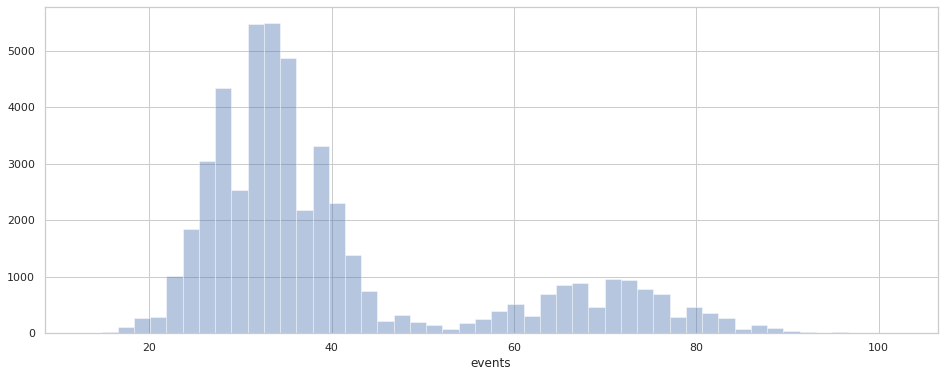

In [10]:
url_2 = 'https://stepik.org/media/attachments/lesson/385920/5_task_2.csv'
task_2 = pd.read_csv(url_2)
#stats.levene(task_2.query('group == "A"').events, task_1.query('group == "B"').events, task_1.query('group == "C"').events, center='median')
sns.distplot(task_2.query('group == "test"').events, kde = False)


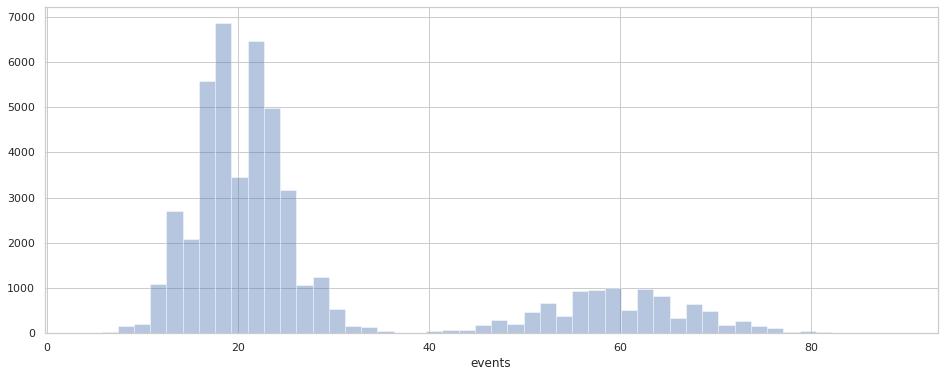

In [11]:
sns.distplot(task_2.query('group == "control"').events, kde = False)

In [12]:
task_2

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


9. Посчитайте среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя. 

В качестве ответа укажите стандартное отклонение для пользователей из сегмента high и контрольной группы, с точностью до 2 знаков после точки.

In [13]:
task_2.groupby(['segment', 'group']).events.describe().T.round(2)

segment      high                 low          
group     control      test   control      test
count    10000.00  10000.00  40000.00  40000.00
mean        59.97     69.94     20.03     33.03
std          7.81      8.40      4.47      5.72
min         31.00     40.00      4.00     13.00
25%         55.00     64.00     17.00     29.00
50%         60.00     70.00     20.00     33.00
75%         65.00     76.00     23.00     37.00
max         89.00    102.00     41.00     59.00

10. Почти у цели – осталось выбрать формулу для модели. Напомним, что мы хотим проверить эффект нескольких переменных – group и segment на events, с взаимодействием факторов.
Какую формулу используете?
   - events = segment + group + segment:group
   - events = segment + group
   - events ~ segment + group
   - events ~ segment, group
   - **events ~ segment + group + segment:group**

11. Проведите тест, а затем используйте критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия.

В данном случае для последующих сравнений между группами можно проделать следующую операцию: 
соединить колонки group и segment в combination, чтобы потом передать в аргумент groups в MultiComparison:    
Между какими группами были обнаружены статистически значимые различия? Выберите верные утверждени


   - Различий совсем не оказалось :(

   - **Разница между значением у тестовой группы сегмента low и контрольной группой этого же сегмента равна примерно 13**

   - **Для обоих сегментов показатели статистически значимо _увеличились_ по сравнению с контрольной группой**

   - Разница между значением у тестовой группы сегмента low и контрольной группой этого же сегмента равна примерно 36

   - **Разница между control/high и test/high составила около 10**

   - Для обоих сегментов показатели статистически значимо _уменьшились_ по сравнению с контрольной группой

In [14]:
model = smf.ols(formula= 'events ~ segment + group + segment:group', data = task_2).fit()
aov_table = anova_lm(model, typ = 2)
print(round(aov_table, 2))

                    sum_sq       df          F  PR(>F)
segment        23624796.65      1.0  689756.38     0.0
group           3837195.41      1.0  112031.86     0.0
segment:group     36642.44      1.0    1069.82     0.0
Residual        3424955.89  99996.0        NaN     NaN


In [15]:
task_2['combination'] = task_2['group'] + '\\' + task_2['segment']
task_2.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,test\high
1,96723,test,high,71.0,test\high
2,68719,test,high,80.0,test\high
3,50399,test,high,80.0,test\high
4,95613,test,high,78.0,test\high


In [16]:
#Как по таблице понять, где различия значимые?
#Смотрим на столбец reject. Если там стоит True - различия значимые
task_summary = pairwise_tukeyhsd(task_2.events, task_2.combination).summary()
print(task_summary)

print('Разница между значением у тестовой группы сегмента low и контрольной группой этого же сегмента равна примерно 13')

print('Для обоих сегментов показатели статистически значимо _увеличились_ по сравнению с контрольной группой')

print('Разница между control/high и test/high составила около 10')



      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2   meandiff p-adj  lower    upper   reject
----------------------------------------------------------------
control\high control\low -39.9392 0.001 -40.1073 -39.7711   True
control\high   test\high   9.9677 0.001   9.7551  10.1803   True
control\high    test\low -26.9449 0.001  -27.113 -26.7768   True
 control\low   test\high  49.9069 0.001  49.7388   50.075   True
 control\low    test\low  12.9944 0.001   12.888  13.1007   True
   test\high    test\low -36.9126 0.001 -37.0807 -36.7445   True
----------------------------------------------------------------
Разница между значением у тестовой группы сегмента low и контрольной группой этого же сегмента равна примерно 13
Для обоих сегментов показатели статистически значимо _увеличились_ по сравнению с контрольной группой
Разница между control/high и test/high составила около 10


12. Визуализируйте результаты теста и заполните пропуски:
Фактор group оказался значимым, фактор segment – значимым, их взаимодействие – значимо. Судя по графику, для всех групп среднее значение events увеличилось , поэтому решение: 
выкатываем новую версию

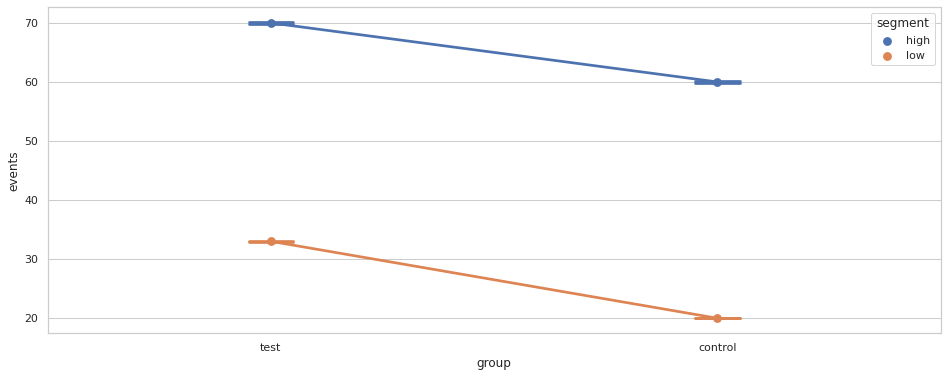

In [17]:
sns.pointplot(x = 'group', y = 'events', hue = 'segment', data = task_2, capsize = .1)
plt.show()